# Predicción de Concentración de PM2.5

Objetivo: Predecir la concentración futura de PM2.5 en función de variables temporales, estación y otros contaminantes.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file = 'data/final/clean/datos_Clean_2023.csv'
df = pd.read_csv(file)
df

,O3,O3_8hrs,NO2,CO,SO2,PM10,PM2_5,Estacion,DateTime,Anio,Mes,Dia,Hora
0,0.004,0.009,0.020,1.63,0.001,125.0,61.0,santa,2023-01-01 00:00:00,2023,1,1,0
1,0.003,0.007,0.018,1.85,0.001,145.0,64.0,santa,2023-01-01 01:00:00,2023,1,1,1
2,0.003,0.004,0.018,1.98,0.002,176.0,102.0,santa,2023-01-01 02:00:00,2023,1,1,2
3,0.003,0.003,0.017,2.07,0.002,191.0,131.0,santa,2023-01-01 03:00:00,2023,1,1,3
4,0.003,0.003,0.015,2.05,0.002,191.0,139.0,santa,2023-01-01 04:00:00,2023,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.031,0.045,0.021,0.85,0.002,32.0,9.0,vel,2023-12-31 19:00:00,2023,12,31,19
43796,0.018,0.042,0.031,0.91,0.002,48.0,15.0,vel,2023-12-31 20:00:00,2023,12,31,20
43797,0.013,0.038,0.035,1.06,0.002,65.0,19.0,vel,2023-12-31 21:00:00,2023,12,31,21
43798,0.008,0.033,0.040,1.26,0.002,91.0,33.0,vel,2023-12-31 22:00:00,2023,12,31,22


In [2]:
# Asegurar que la columna DateTime sea del tipo datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   O3        40225 non-null  float64       
 1   O3_8hrs   40076 non-null  float64       
 2   NO2       37028 non-null  float64       
 3   CO        40570 non-null  float64       
 4   SO2       38076 non-null  float64       
 5   PM10      39627 non-null  float64       
 6   PM2_5     36019 non-null  float64       
 7   Estacion  43800 non-null  object        
 8   DateTime  43800 non-null  datetime64[ns]
 9   Anio      43800 non-null  int64         
 10  Mes       43800 non-null  int64         
 11  Dia       43800 non-null  int64         
 12  Hora      43800 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 4.3+ MB


In [5]:
# Importar librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Seleccionar variables predictoras y variable objetivo
features = ['Hora', 'Mes', 'NO2', 'CO', 'SO2', 'PM10', 'O3', 'O3_8hrs', 'Estacion']
target = 'PM2_5'

# Crear variables dummy para la estación
df_dummies = pd.get_dummies(df[features], columns=['Estacion'], drop_first=True)

# Añadir la variable objetivo
df_dummies[target] = df[target]

# Eliminar posibles nulos restantes
df_dummies.dropna(inplace=True)

# Separar en variables X (predictores) e y (objetivo)
X = df_dummies.drop(columns=[target])
y = df_dummies[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(6.47214522453605, np.float64(9.447768973675828), 0.5863122438702792)

# 📊 Resultados del modelo de regresión lineal para predecir PM2.5

- MAE (Error absoluto medio): ~6.47 µg/m³
  → En promedio, el modelo se equivoca por 6.47 unidades.

- RMSE (Error cuadrático medio): ~9.45 µg/m³
  → Penaliza más los errores grandes; aún dentro de un rango razonable.

- R² (Coeficiente de determinación): 0.586
  → El modelo explica aproximadamente 59% de la variabilidad en PM2.5.

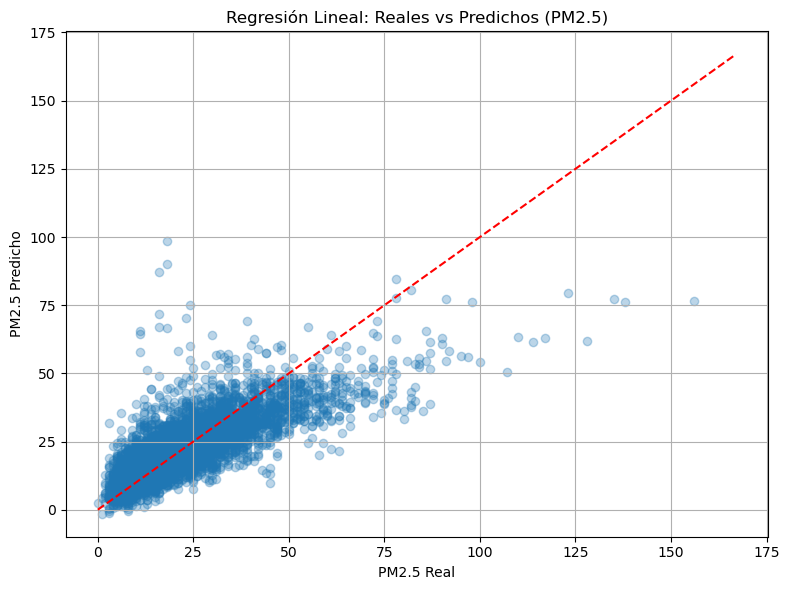

In [6]:
import matplotlib.pyplot as plt

# Visualización: Reales vs Predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('PM2.5 Real')
plt.ylabel('PM2.5 Predicho')
plt.title('Regresión Lineal: Reales vs Predichos (PM2.5)')
plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico muestra una buena alineación general entre los valores reales y los predichos por el modelo lineal, aunque:

- Hay cierta dispersión en niveles altos de PM2.5, lo cual es común en modelos lineales sin transformaciones.

- El modelo tiende a subestimar los valores altos (los puntos se quedan por debajo de la línea roja en la parte superior).

Esto sugiere que podríamos mejorar la precisión con modelos no lineales.

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predicciones con Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluación del modelo
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

rf_mae, rf_rmse, rf_r2


(4.305926487305798, np.float64(6.225860407795461), 0.8203559260322)

🌲 Random Forest – Rendimiento:

- MAE: ~4.31 µg/m³
  → Mejora notable frente al modelo lineal (~6.47)

- RMSE: ~6.23 µg/m³
  → Menor error cuadrático → mejor manejo de valores extremos

- R²: 0.82
  → El modelo explica el 82% de la variabilidad en PM2.5 → muy buen ajuste

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear variable binaria: 1 si PM2.5 > 25, 0 si no
df_dummies['PM2_5_alerta'] = (df_dummies['PM2_5'] > 25).astype(int)

# Redefinir variables
X_class = df_dummies.drop(columns=['PM2_5', 'PM2_5_alerta'])
y_class = df_dummies['PM2_5_alerta']

# Dividir en entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Entrenar modelo de clasificación
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# Predicción
y_pred_c = clf.predict(X_test_c)

# Evaluación
matriz_confusion = confusion_matrix(y_test_c, y_pred_c)
reporte = classification_report(y_test_c, y_pred_c, output_dict=True)

matriz_confusion, reporte


(array([[3244,  259],
        [ 336, 1439]]),
 {'0': {'precision': 0.906145251396648,
   'recall': 0.9260633742506423,
   'f1-score': 0.915996046872794,
   'support': 3503.0},
  '1': {'precision': 0.8474676089517079,
   'recall': 0.8107042253521127,
   'f1-score': 0.8286783760437662,
   'support': 1775.0},
  'accuracy': 0.8872679045092838,
  'macro avg': {'precision': 0.876806430174178,
   'recall': 0.8683837998013775,
   'f1-score': 0.8723372114582801,
   'support': 5278.0},
  'weighted avg': {'precision': 0.886411864632766,
   'recall': 0.8872679045092838,
   'f1-score': 0.8866309718971356,
   'support': 5278.0}})

📈 Métricas clave

- Accuracy (precisión global): 88.7%

- Clase 1 (alerta):

  - Precisión: 84.7% → cuando el modelo predice “alerta”, acierta el 84.7%

  - Recall (sensibilidad): 81.1% → detecta el 81.1% de los días realmente críticos

- Clase 0 (no alerta):

  - Muy alto desempeño (precisión y recall >90%)

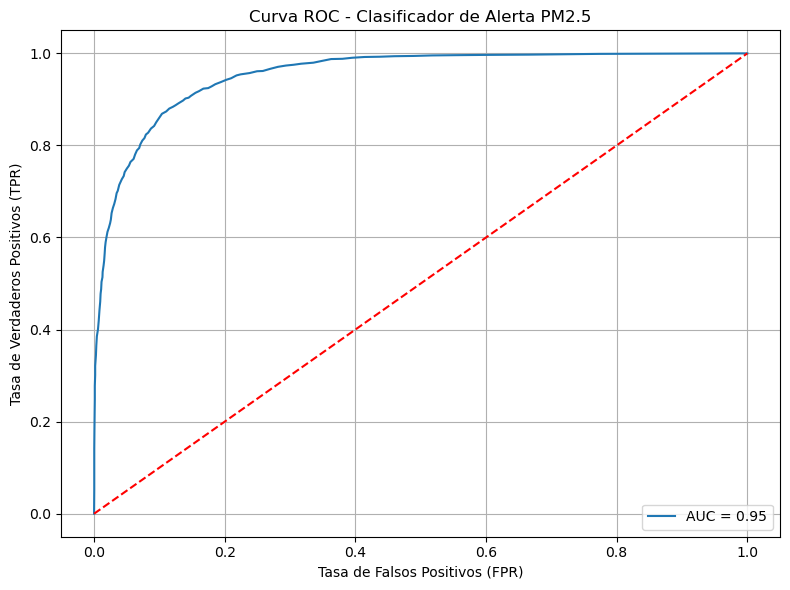

In [10]:
from sklearn.metrics import roc_curve, auc

# Calcular probabilidades para curva ROC
y_proba_c = clf.predict_proba(X_test_c)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_c, y_proba_c)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador de Alerta PM2.5')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


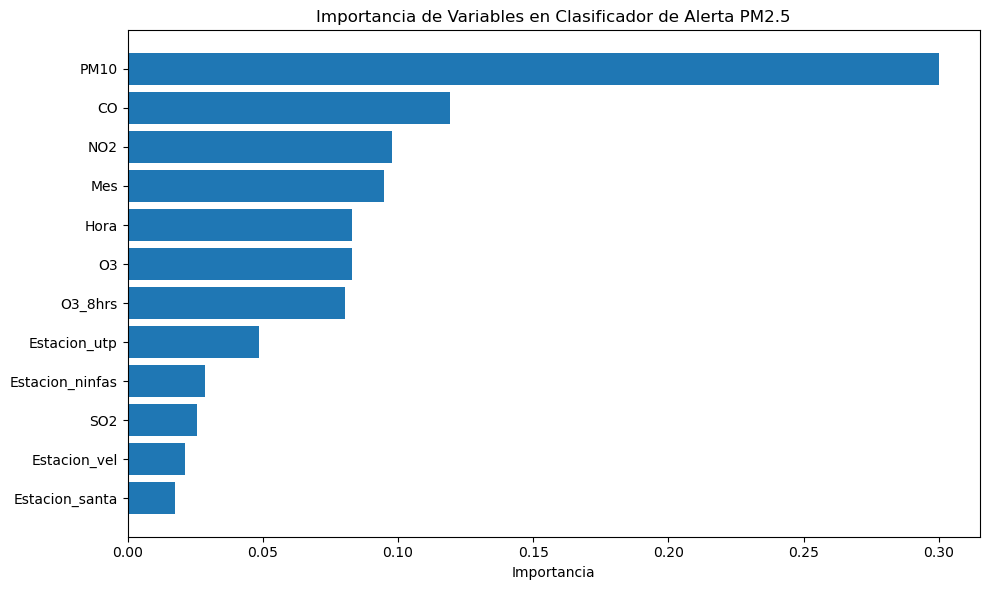

In [11]:
# Obtener importancias de variables del modelo Random Forest
importances = clf.feature_importances_
feature_names = X_class.columns

# Crear gráfico de barras con las importancias
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.gca().invert_yaxis()
plt.title('Importancia de Variables en Clasificador de Alerta PM2.5')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


# 🔍 Importancia de Variables en el Modelo de Alerta PM2.5

Las variables que más influyen en la predicción de alertas por PM2.5 son:

- PM10 → principal predictor (alta correlación y relación directa)

- CO, NO₂ y SO₂ → otros contaminantes significativos (fuentes comunes o indicadores indirectos)

- Hora y Mes → variables temporales relevantes, capturan picos diarios y estacionalidad

- Estaciones (dummy variables) como Estacion_vel, Estacion_santa también tienen peso, lo que indica diferencias geográficas